# Prosper Loan Data Explanatory Analysis
## by Chizaram Emenyonu

## Investigation Overview


> Prosper was founded in 2005 as the first peer-to-peer lending marketplace in the United States. Since then, Prosper has facilitated more than USD 12 billion in loans to more than 770,000 people.
> This investigation will be analyzing factors that influence borrow's APR and how each loan were taken by what type of borrowers. Gotten from: https://www.prosper.com/about

## Dataset Overview

> The Dataset contains 113,917 loans, each row has infomation on the borrow's APR, status, borrowed amount, debt, etc. Variables with many missing values were dropped to make the Dataset more accurate. Outliers were also removed to provide more reliable Data. This study will be analyzing factors that could influence borrow's APR and which loans were taken by what type of borrowers.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)

df_complete = pd.read_csv('ProsperLoanData.csv')

In [3]:
# data wrangling
# Select interested variables
variables = ['ListingCreationDate', 'LoanOriginalAmount', 'LoanOriginationDate', 'ListingCategory (numeric)', 
             'ProsperRating (Alpha)','ProsperScore', 'Occupation', 'IncomeVerifiable', 'EmploymentStatus', 'IsBorrowerHomeowner', 
             'LoanStatus','CreditScoreRangeLower', 'CurrentCreditLines', 'IncomeRange','BorrowerRate','StatedMonthlyIncome',
             'OpenRevolvingAccounts', 'DebtToIncomeRatio', 'CreditScoreRangeUpper','BorrowerState', 'Term', 'BorrowerAPR']

In [4]:
#Make a dataframe
df = df_complete[variables]

In [5]:
# Rename columns
df.rename(columns={'ListingCategory (numeric)': 'ListingCategory', 'ProsperRating (Alpha)': 'ProsperRating'}, inplace=True)

In [6]:
# Convert date columns from strings to dates
df.LoanOriginationDate = pd.to_datetime(df.LoanOriginationDate)
df.ListingCreationDate = pd.to_datetime(df.ListingCreationDate)

In [7]:
# Removing all numeric values from the ListingCategory column
list_cat = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
            4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby & Adoption', 
            9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
           13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical or Dental', 16 : 'Motorcycle',
           17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

df['ListingCategory'] = df['ListingCategory'].map(list_cat)

In [8]:
# Convert ProsperRating from strings to categorical datatype
prosper_rating = ['AA', 'A', 'B', 'C', 'D', 'E','HR']
correct_rating = pd.api.types.CategoricalDtype(ordered = True, categories = prosper_rating)
df['ProsperRating'] = df['ProsperRating'].astype(correct_rating)

In [9]:
# Filling null values with Not Specified
df['Occupation'] = df['Occupation'].fillna('Not Specified')

In [10]:
#ProsperRating and BorrowerAPR are 2 important variables for this analysis. I will select only rows with not null values
empty_values = ['BorrowerAPR', 'ProsperRating']

for values in empty_values:
    df = df[df[values].notnull()]

In [11]:
# Function to call the figsize
def fig_size(a,b):
    # calling figsize parameters
    return plt.figure(figsize=(a,b))

In [12]:
#This function gives chart title, x and y axis. It is created to avoid repetition
def pltlabels(a,b,c):
    return plt.title(a),plt.xlabel(b),plt.ylabel(c)

In [13]:
color=sb.color_palette()[0]

## Distribution of BorrowerAPR

>The highest BorrowerAPR is 0.35797% with 3672 counts. The lowest rate is 0.35356% with just 721 count. The Borrower APR plot has a multimodal distribution, with different peaks.

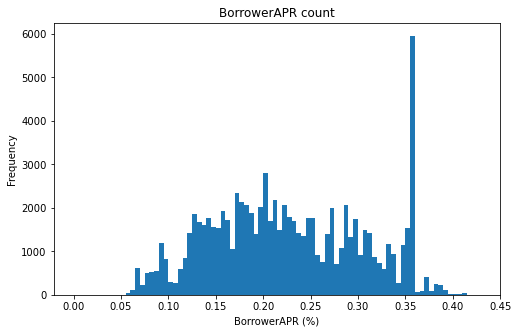

In [14]:
# see the counts for all BorrowerAPR values
fig_size(8, 5)
bins = np.arange(0, df['BorrowerAPR'].max(), 0.005)
plt.hist(data = df, x = 'BorrowerAPR', bins = bins)
pltlabels('BorrowerAPR count', 'BorrowerAPR (%)', 'Frequency');
plt.xticks(np.arange(0, df['BorrowerAPR'].max()+0.05, 0.05));

## Distribution of IncomeRange

>The Borrowers fell among differrent income ranges. Although the highest count of borrowers fell within the 50,000 - 74,999 range, Income Range doesn't seem to be a major factor as people earning over 100,000 still borrowed from Prosper.

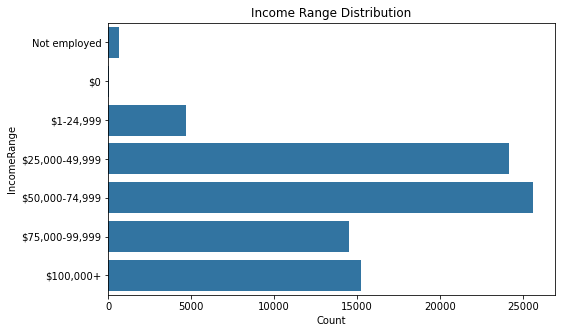

In [15]:
fig_size(8, 5)
order =  ['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
sb.countplot(data = df, y = 'IncomeRange', color = color, order=order)
plt.xticks(rotation = 0)
pltlabels('Income Range Distribution', 'Count', 'IncomeRange');

## Distribution of DebtToIncomeRatio

>The distribution is skewed to the right. The chart above suggests that borrowers have a good balance between debt and income.

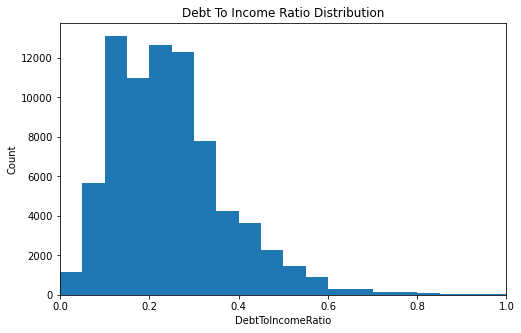

In [16]:
fig_size(8, 5)
binsize = 0.05
bins = np.arange(0, df['DebtToIncomeRatio'].max()+binsize, binsize)
plt.hist(data = df, x = 'DebtToIncomeRatio', bins = bins)
pltlabels('Debt To Income Ratio Distribution', 'DebtToIncomeRatio', 'Count')
plt.xlim(0,1);

## BorrowerAPR vs IncomeRange

> The plot shows that Borrower APR reduces as the Income Range of borrowers increase. This means that borrrowers that have high income enjoy lower interest rates on the platform. This make sense becasue people with higher income tend to be more reliable and therefore given lower BorrowerAPR.


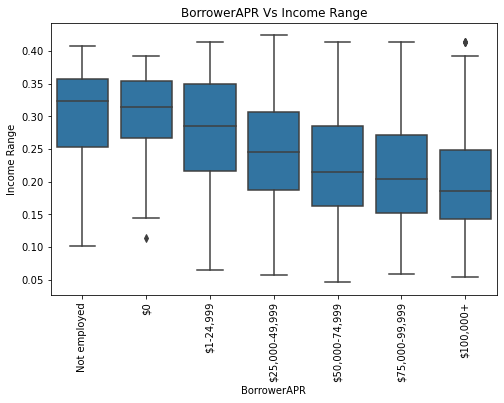

In [17]:
order = ['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
fig_size(8,5)
sb.boxplot(data=df, x='IncomeRange', y='BorrowerAPR', color=color, order=order)
plt.xticks(rotation=90)
pltlabels('BorrowerAPR Vs Income Range','BorrowerAPR', 'Income Range');

## IncomeRange Vs DebtToIncomeRatio

> From the visualization, borrowers with a high income have a lower debt to income ratio as they earn enough to settle off their loans quickly and easily. People within the highest range (100,000+) have the lowest ratio.

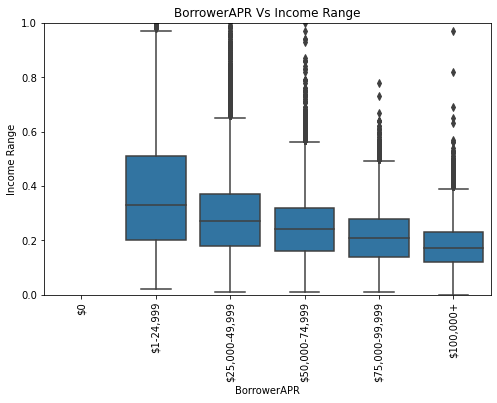

In [18]:
fig_size(8,5)
order = ['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
fig = sb.boxplot(data=df, x='IncomeRange', y='DebtToIncomeRatio', color=color, order=order)
fig.axes.set_ylim(0, 1) #Zooming in to see the boxplot clearly
plt.xticks(rotation=90)
pltlabels('BorrowerAPR Vs Income Range','BorrowerAPR', 'Income Range');

## BorrowerAPR Vs IncomeRange and ProsperRating
> This visualization helps to analyze BorrowerAPR vs IncomeRange on different Prosper ratings. The patterns shows the Higest rating AA of borrowers have the lowest APR. For low rating HR, the borrowers have the highest APR. This visualization classifies groups of borrowers in terms of APR received based on their rating and Income.

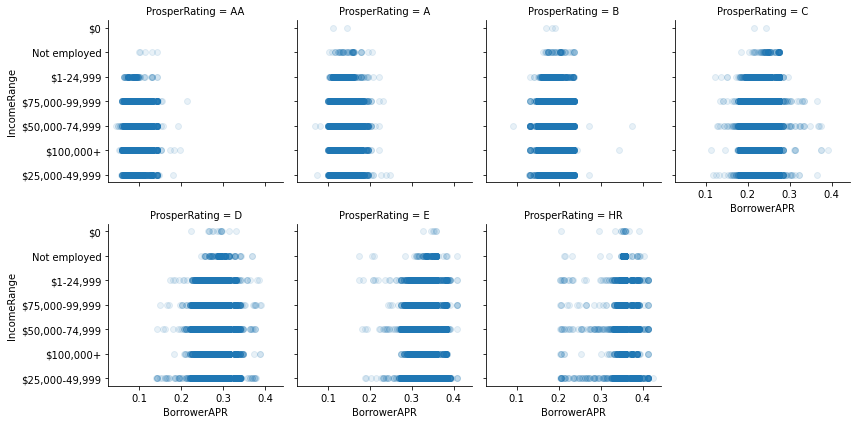

In [19]:
g = sb.FacetGrid(data = df, col = 'ProsperRating', col_wrap = 4, size = 3)

g.map(plt.scatter, 'BorrowerAPR', 'IncomeRange', alpha = 0.1)
g.set_xlabels('BorrowerAPR')
g.set_ylabels('IncomeRange')

plt.show()

# Thank you for your attention

In [20]:
!jupyter nbconvert ProsperLoan_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook ProsperLoan_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 734682 bytes to ProsperLoan_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\nbconvert\nbconvertapp.py", line 426, in start
    self.convert_notebooks()
  File "C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\nbconvert\nbconvertapp.py", line 600, in convert_notebook